In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, reset_output
from bokeh.embed import file_html
from bokeh.models import LabelSet, Label, ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
import bokeh.plotting as bp
%matplotlib inline

In [107]:
data = pd.read_csv("./MC1/mc1-reports-data.csv",parse_dates=True,infer_datetime_format=True, index_col=0)
data = data.sort_index()
data.head()

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17
2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2
2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8
2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4
2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15


- time: timestamp of incoming report/record, in the format YYYY-MM-DD hh:mm:ss

In [27]:
pd.unique(data.index)

array(['2020-04-06T00:00:00.000000000', '2020-04-06T00:05:00.000000000',
       '2020-04-06T00:10:00.000000000', ...,
       '2020-04-10T23:50:00.000000000', '2020-04-10T23:55:00.000000000',
       '2020-04-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [28]:
dd = [sum(data.index.day==6),sum(data.index.day==7),sum(data.index.day==8),sum(data.index.day==9),
sum(data.index.day==10),sum(data.index.day==11)]
print(dd)

[4963, 2252, 43670, 24935, 7244, 6]


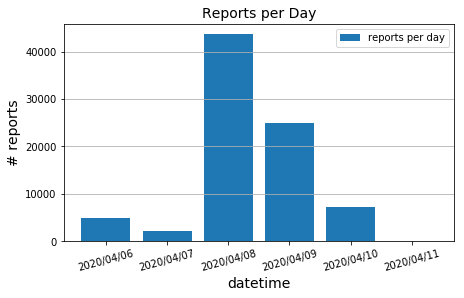

In [29]:
plt.figure(figsize=(7,4))
plt.xticks(range(len(dd)),["2020/04/06","2020/04/07","2020/04/08","2020/04/09","2020/04/10","2020/04/11"],
          rotation=15)
plt.title("Reports per Day", size=14)
plt.ylabel("# reports", size=14)
plt.xlabel("datetime", size=14)
plt.grid(axis='y');
plt.bar(range(len(dd)),dd, label="reports per day");
plt.legend();

#### Descripción
- se puede concluir que el día 8 se sintió mucho más el daño, o puede ser que ese día volvió la energía y las personas se pudieron comunicar.

In [30]:
data.loc[data.index.day==8].index[0]

Timestamp('2020-04-08 00:00:00')

In [31]:
data.loc[data.index.day==6]

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-06 00:00:00,2.0,4.0,1.0,NaN,4.0,NaN,17
2020-04-06 00:00:00,2.0,8.0,5.0,NaN,3.0,0.0,2
2020-04-06 00:00:00,9.0,7.0,5.0,NaN,4.0,NaN,8
2020-04-06 00:00:00,10.0,2.0,9.0,NaN,10.0,NaN,4
2020-04-06 00:00:00,6.0,2.0,9.0,NaN,4.0,1.0,15
2020-04-06 00:00:00,9.0,7.0,4.0,NaN,8.0,0.0,18
2020-04-06 00:00:00,8.0,1.0,10.0,NaN,3.0,1.0,4
2020-04-06 00:00:00,6.0,3.0,10.0,10.0,9.0,NaN,3
2020-04-06 00:05:00,10.0,3.0,8.0,4.0,1.0,NaN,6


In [32]:
data.loc[data["location"]==8].loc[data.loc[data["location"]==8].index.day==6].shape[0]

654

In [33]:
pd.unique(data.index.day)

array([ 6,  7,  8,  9, 10, 11])

In [34]:
step = 0
df_map = pd.DataFrame(columns=["neighborhood","name","x","y","r","quantidade"])
df_aux = pd.DataFrame(columns=["neighborhood","name","x","y","r","quantidade"])
x = np.array([65,80,100,118,80,78,148,133,110,125,135,135,120,99,88,88,110,110,98])
for indx in pd.unique(data.index.day):
    x = x + step
    y = np.array([135,145,153,130,100,122,98,53,60,68,70,95,98,125,125,110,85,105,105])
    r = []
    for n in np.arange(1,20): #recorrer los vecinos
        r.append(data.loc[data["location"]==n].loc[data.loc[data["location"]==n].index.day==indx].shape[0])
    step = 110
    df_aux["neighborhood"] = np.arange(1,20)
    df_aux["name"] = ["Palace Hills", "Northwest","Old Town", "Safe Town","Southwest","Downtown",
                       "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "TerrapinSprings",
                       "Pepper Mill", "CheddardFord", "Easton", "Weston", "Southon", "Oak Willow",
                       "East Parton", "West Parton"]
    df_aux["x"] = x
    df_aux["y"] = y
    df_aux["r"] = (np.array(r)/max(r))*3
    df_aux["quantidade"] = r
    #se llena el dataFrame
    df_map = pd.concat([df_map,df_aux])
print(df_map.shape)
df_map.head()

(114, 6)


,neighborhood,name,x,y,r,quantidade
0,1,Palace Hills,65,135,0.481651,105
1,2,Northwest,80,145,1.788991,390
2,3,Old Town,100,153,2.733945,596
3,4,Safe Town,118,130,0.522936,114
4,5,Southwest,80,100,0.885321,193


In [36]:
reset_output() #Para que no abra un nuevo navegador
output_notebook()
#output_file('./resultados/image1.html')
TITLE = "Chamadas por area em os días do terremoto"
TOOLS = "hover,box_select,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above",width=1000, height=500,
           x_range=(49,350), y_range=(-20,250), title=TITLE)
#MAPA DEL DÍA 6
p.image_url(url=['MC1/mapa.svg'], x=50,y=180,w=100,h=150)
citation = Label(x=100, y=185,text='Dia 6', text_font_size="24px")
p.add_layout(citation)
#MAPA DEL DÍA 7
p.image_url(url=['MC1/mapa.svg'], x=160,y=180,w=100,h=150)
citation = Label(x=200, y=185,text='Dia 7', text_font_size="24px")
p.add_layout(citation)
#MAPA DEL DÍA 8
p.image_url(url=['MC1/mapa.svg'], x=270,y=180,w=100,h=150)
citation = Label(x=310, y=185,text='Dia 8', text_font_size="24px")
p.add_layout(citation)
#MAPA DEL DÍA 9
p.image_url(url=['MC1/mapa.svg'], x=380,y=180,w=100,h=150)
citation = Label(x=420, y=185,text='Dia 9', text_font_size="24px")
p.add_layout(citation)
#MAPA DEL DÍA 10
p.image_url(url=['MC1/mapa.svg'], x=490,y=180,w=100,h=150)
citation = Label(x=530, y=185,text='Dia 10', text_font_size="24px")
p.add_layout(citation)
#MAPA DEL DÍA 11
p.image_url(url=['MC1/mapa.svg'], x=600,y=180,w=100,h=150)
citation = Label(x=640, y=185,text='Dia 11', text_font_size="24px")
p.add_layout(citation)
p.circle(x="x",y="y", source = ColumnDataSource(df_map), fill_color="red", line_color="black",
         alpha=0.8, radius="r", legend="# de chamadas")
p.hover.tooltips = [
    ("name", "@name"),
    ("neighborhood", "@neighborhood"),
    ("quantidade:", "@quantidade")
]
show(p)

Loading BokehJS ...

#### Acumulado de llamadas durante los dias

In [37]:
df_acu = pd.DataFrame(columns=["neighborhood","name","x","y","r","quantidade"])
amount = []
for nbs in range(1,20):
    amount.append(data.loc[data.location==nbs].shape[0])
amount = np.array(amount)
df_acu["neighborhood"] = range(1,20)
df_acu["r"] = (amount/max(amount))*3
df_acu["name"] = ["Palace Hills", "Northwest","Old Town", "Safe Town","Southwest","Downtown",
                       "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "TerrapinSprings",
                       "Pepper Mill", "CheddardFord", "Easton", "Weston", "Southon", "Oak Willow",
                       "East Parton", "West Parton"]
df_acu["x"] = np.array([65,80,100,118,80,78,148,133,110,125,135,135,120,99,88,88,110,110,98])
df_acu["y"] = np.array([135,145,153,130,100,122,98,53,60,68,70,95,98,125,125,110,85,105,105])
df_acu["quantidade"] = amount

In [38]:
df_acu.head()

,neighborhood,name,x,y,r,quantidade
0,1,Palace Hills,65,135,0.358989,1662
1,2,Northwest,80,145,1.164231,5390
2,3,Old Town,100,153,2.923537,13535
3,4,Safe Town,118,130,0.630499,2919
4,5,Southwest,80,100,0.369357,1710


In [39]:
reset_output() #Para que no abra un nuevo navegador
output_notebook()
#output_file('./resultados/image3.html')
TITLE = "Acumulado de chamadas nos dias do terremoto"
TOOLS = "hover,box_select,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above",width=1000, height=500,
           x_range=(30,180), y_range=(35,185), title=TITLE)
#MAPA
p.image_url(url=['MC1/mapa.svg'], x=50,y=180,w=100,h=150)
p.circle(x="x",y="y", source = ColumnDataSource(df_acu), fill_color="red", line_color="black",
         alpha=0.8, radius="r", legend="# de chamadas")
p.hover.tooltips = [
    ("name", "@name"),
    ("neighborhood", "@neighborhood"),
    ("quantidade:", "@quantidade")
]
show(p)

Loading BokehJS ...

In [108]:
#Se filtran los NaN y se colocan en cero, ya que no tienen relevancia
data = data.fillna(value=0)
data.head()

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-06,2.0,4.0,1.0,0.0,4.0,0.0,17
2020-04-06,2.0,8.0,5.0,0.0,3.0,0.0,2
2020-04-06,9.0,7.0,5.0,0.0,4.0,0.0,8
2020-04-06,10.0,2.0,9.0,0.0,10.0,0.0,4
2020-04-06,6.0,2.0,9.0,0.0,4.0,1.0,15


In [45]:
19*6

114

In [46]:
df_mean = data.groupby(by="location").mean()
df_mean.head()

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity
location,,,,,,
1,4.740072,4.759326,4.867629,4.974729,4.904934,0.329723
2,3.413544,4.313544,4.779777,0.089054,1.960111,1.266605
3,7.275434,8.461396,7.267085,7.055264,5.831991,4.590100
4,5.468654,4.224049,4.213772,0.096608,3.692018,4.263789
5,4.205263,5.065497,4.083626,2.110526,3.494737,0.519298


In [47]:
names = np.array(list(df_mean.columns))
locations = np.arange(1,20)
names.shape, locations.shape

((6,), (19,))

In [48]:
x = [(str(loc), nbs) for loc in locations for nbs in names ]
counts = []
#colocar cada dato
for idx in df_mean.index:
    counts.append(df_mean.loc[idx])
counts = np.ravel(np.array(counts))
len(x), len(counts)

(114, 114)

In [49]:
dict(x=x, counts=counts)

{'x': [('1', 'sewer_and_water'),
  ('1', 'power'),
  ('1', 'roads_and_bridges'),
  ('1', 'medical'),
  ('1', 'buildings'),
  ('1', 'shake_intensity'),
  ('2', 'sewer_and_water'),
  ('2', 'power'),
  ('2', 'roads_and_bridges'),
  ('2', 'medical'),
  ('2', 'buildings'),
  ('2', 'shake_intensity'),
  ('3', 'sewer_and_water'),
  ('3', 'power'),
  ('3', 'roads_and_bridges'),
  ('3', 'medical'),
  ('3', 'buildings'),
  ('3', 'shake_intensity'),
  ('4', 'sewer_and_water'),
  ('4', 'power'),
  ('4', 'roads_and_bridges'),
  ('4', 'medical'),
  ('4', 'buildings'),
  ('4', 'shake_intensity'),
  ('5', 'sewer_and_water'),
  ('5', 'power'),
  ('5', 'roads_and_bridges'),
  ('5', 'medical'),
  ('5', 'buildings'),
  ('5', 'shake_intensity'),
  ('6', 'sewer_and_water'),
  ('6', 'power'),
  ('6', 'roads_and_bridges'),
  ('6', 'medical'),
  ('6', 'buildings'),
  ('6', 'shake_intensity'),
  ('7', 'sewer_and_water'),
  ('7', 'power'),
  ('7', 'roads_and_bridges'),
  ('7', 'medical'),
  ('7', 'buildings'),
 

In [50]:
reset_output()

In [51]:
from bokeh.palettes import Spectral6, Category10

Totalnames = list(names)*len(locations)
nbs_aux = list(["Palace Hills", "Northwest","Old Town", "Safe Town","Southwest","Downtown",
                       "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "TerrapinSprings",
                       "Pepper Mill", "CheddardFord", "Easton", "Weston", "Southon", "Oak Willow",
                       "East Parton", "West Parton"])
nbs_names = []
for nbs in nbs_aux:
    for nv in range(len(names)):
        nbs_names.append(nbs)
source = ColumnDataSource(data=dict(x=x, counts=counts, names=Totalnames, nbs_name=nbs_names))
TITLE = "Meia de intensidade do danho"
p = figure(x_range=FactorRange(*x),tools="hover,box_select,pan,wheel_zoom,box_zoom,reset,save",
           height=500, width=1300, title=TITLE)

nbs = df_mean.columns
palette = ["blue", "red", "green","brown","orange","grey"]
p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
      fill_color=factor_cmap('x', palette=Category10[6], factors=nbs, start=1, end=2))
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.6
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "neighborhood"
p.yaxis.axis_label = "intensity"
p.hover.tooltips = [
    ("neighborhood","@nbs_name"),
    ("name", "@names"),
    ("intensity","@counts")
]
#output_file("./resultados/image4.html")
show(p)

In [25]:
np.mean(data.loc[data["location"]==5]["shake_intensity"])

0.519298245614035

In [26]:
reset_output()

### Acumulado de la intensidad del terremoto por vecindario

In [24]:
reset_output() #Para que no abra un nuevo navegador
output_notebook()
df_acu["shake_intensity"] = df_mean.shake_intensity.reset_index(drop=True)
output_file('./resultados/image6.html')
TITLE = "Acumulado do intensidade do terremoto"
TOOLS = "hover,box_select,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above",width=1000, height=500,
           x_range=(30,180), y_range=(35,185), title=TITLE)
#MAPA
p.image_url(url=['MC1/mapa.svg'], x=50,y=180,w=100,h=150)
p.circle(x="x",y="y", source = ColumnDataSource(df_acu), fill_color="red", line_color="black",
         alpha=0.75, radius="shake_intensity", legend="intensity")
p.circle(x="x",y="y", source = ColumnDataSource(df_acu), fill_color="grey", line_color="black",
         alpha=0.8, radius="r", legend="# de chamadas")
p.hover.tooltips = [
    ("name", "@name"),
    ("neighborhood", "@neighborhood"),
    ("shake intensity", "@shake_intensity"),
    ("# de chamadas", "@quantidade")
]
show(p)

Loading BokehJS ...

NameError: name 'df_mean' is not defined

### Representación mapa con diagramas de pizza

In [218]:
df_acu

,neighborhood,name,x,y,r,quantidade
0,1,Palace Hills,65,135,0.358989,1662
1,2,Northwest,80,145,1.164231,5390
2,3,Old Town,100,153,2.923537,13535
3,4,Safe Town,118,130,0.630499,2919
4,5,Southwest,80,100,0.369357,1710
5,6,Downtown,78,122,0.682555,3160
6,7,Wilson Forest,148,98,0.037368,173
7,8,Scenic Vista,133,53,3.000000,13889
8,9,Broadview,110,60,1.899921,8796
9,10,Chapparal,125,68,0.478004,2213


In [223]:
from bokeh.palettes import Category10

df_pizza = data.groupby("location",as_index=True).mean()
reset_output()
output_notebook()
output_file('./resultados/image11.html')
p = figure(width=1200, height=600,
           x_range=(30,180), y_range=(35,185), title="Acumulado do danho do terremoto por estrutura",
           tools="hover,box_select,pan,wheel_zoom,box_zoom,reset,save")
x = np.array([65,80,100,118,80,78,148,133,110,125,135,135,120,99,88,88,110,110,98])
y = np.array([135,145,153,130,100,122,98,53,60,68,70,95,98,125,125,110,85,105,105])
i = 0
ratio = df_acu["r"].values*1.7
p.image_url(url=['MC1/mapa.svg'], x=50,y=180,w=100,h=150)
for idx in range(1,20):
    df_prue = pd.DataFrame()
    df_prue["type"] = df_pizza.columns
    df_prue["value"] = df_pizza.loc[idx,:].values
    df_prue["angle"] = df_prue['value']/df_prue['value'].sum() * 2*pi
    df_prue["color"] = Category10[6]
    df_prue["calls"] = df_acu["quantidade"][i]
    if idx == 1:
        p.wedge(x=x[i], y=y[i], radius=ratio[i],start_angle=cumsum('angle', include_zero=True),
                end_angle=cumsum('angle'), line_color="black", fill_color='color', source=df_prue,
                legend="type", fill_alpha=.8)
    else:
        p.wedge(x=x[i], y=y[i], radius=ratio[i],start_angle=cumsum('angle', include_zero=True),
                end_angle=cumsum('angle'), line_color="black", fill_color='color', source=df_prue,
               fill_alpha=.8)
    p.hover.tooltips = [
        ("name", "@type"),
        ("# chamadas", "@calls"),
        ("magnitude", "@value")
    ]
    i += 1
show(p)

Loading BokehJS ...